In [1]:
!git clone https://github.com/d-t-n/quality-inspection-ai-cv-deep-learning/

Cloning into 'quality-inspection-ai-cv-deep-learning'...
remote: Enumerating objects: 8700, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 8700 (delta 56), reused 66 (delta 26), pack-reused 8600 (from 1)
Receiving objects: 100% (8700/8700), 100.28 MiB | 40.46 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
%cd quality-inspection-ai-cv-deep-learning

/kaggle/working/quality-inspection-ai-cv-deep-learning


In [3]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 90%|███████████████████████████████████▉    | 90.0M/100M [00:00<00:00, 110MB/s]
100%|█████████████████████████████████████████| 100M/100M [00:01<00:00, 102MB/s]


In [4]:
!unzip real-life-industrial-dataset-of-casting-product.zip -d casting_data/

Archive:  real-life-industrial-dataset-of-casting-product.zip
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_100.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1015.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_102.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1046.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1053.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1055.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1077.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1087.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1091.jpeg  
  inflating: casting_data/casting

In [5]:
!jupyter nbconvert --to notebook --execute Model2-Xception-QC.ipynb

[NbConvertApp] Converting notebook Model2-Xception-QC.ipynb to notebook
Exception in thread Heartbeat:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/heartbeat.py", line 99, in run
    self._bind_socket()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/heartbeat.py", line 78, in _bind_socket
    self._try_bind_socket()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/heartbeat.py", line 65, in _try_bind_socket
    return self.socket.bind(f"{self.transport}://{self.ip}" + c + str(self.port))
  File "/opt/conda/lib/python3.10/site-packages/zmq/sugar/socket.py", line 311, in bind
    super().bind(addr)
  File "_zmq.py", line 898, in zmq.backend.cython._zmq.Socket.bind
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
zmq.error.ZMQError: Address already in use (addr='tcp://127.0.0.1:46017')
I0000 00:00:1727888706.2010

In [6]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.preprocessing import image 
from keras.models import Sequential
from sklearn import metrics

In [7]:
# defining dir variables 
root_dir = 'archive/casting_data/casting_data/'
train_defective = root_dir + 'train/def_front/'
train_ok = root_dir + 'train/ok_front/'

test_defective = root_dir + 'test/def_front/'
test_ok = root_dir + 'test/ok_front/'

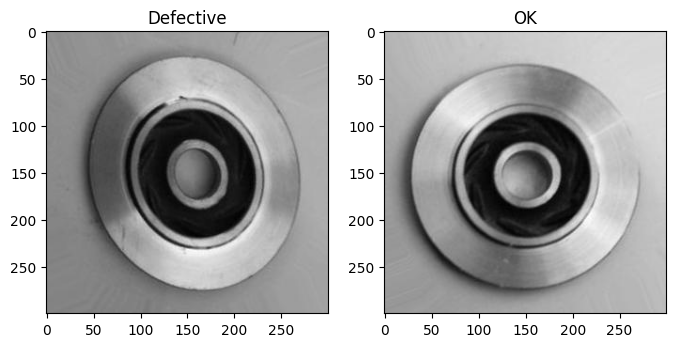

In [8]:
# Ploting images

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(plt.imread(train_defective+os.listdir(train_defective)[0]))
axes[1].imshow(plt.imread(train_ok+os.listdir(train_ok)[0]))
axes[0].set_title('Defective')
axes[1].set_title('OK')
plt.show()

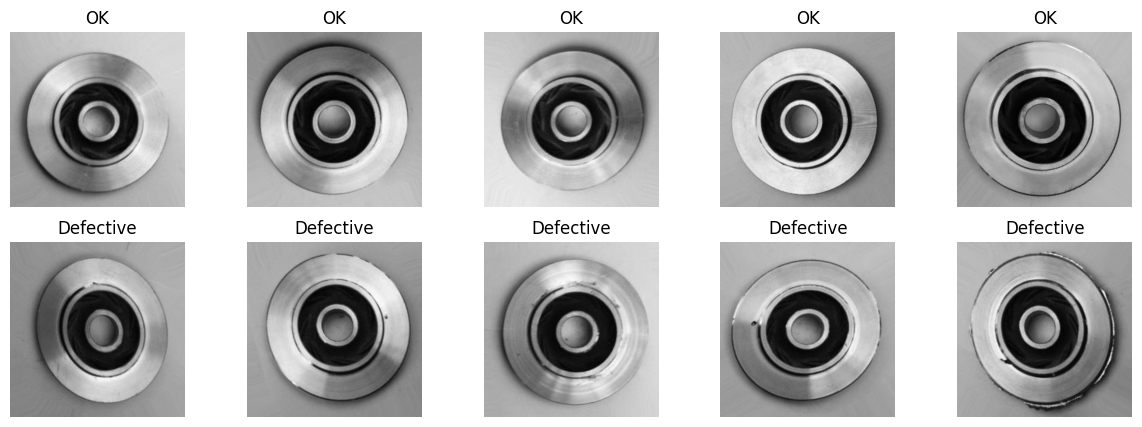

In [9]:
# 5 images from each label - training set

# define the number of images to plot for each label
num_images = 5

# create a figure with two rows and num_images columns
fig, axs = plt.subplots(nrows=2, ncols=num_images, figsize=(15,5))

# plot the ok images
for i, filename in enumerate(os.listdir(train_ok)[:num_images]):
    img = plt.imread(train_ok + filename)
    axs[0,i].imshow(img)
    axs[0,i].set_title('OK')
    axs[0,i].axis('off')

# plot the defective images
for i, filename in enumerate(os.listdir(train_defective)[:num_images]):
    img = plt.imread(train_defective + filename)
    axs[1,i].imshow(img)
    axs[1,i].set_title('Defective')
    axs[1,i].axis('off')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# show the plot
plt.show()

# EDA

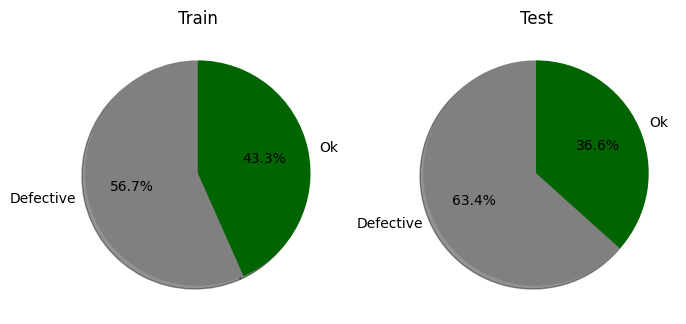

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875

 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [10]:
x_train = np.array([len(os.listdir(train_defective)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_defective)),len(os.listdir(test_ok))])
label = ['Defective','Ok']
colors = ['grey', 'darkgreen']
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_defective))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print()
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_defective))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

In [11]:

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (300, 300)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'rgb',
             'class_mode': 'binary',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'rgb',
            'class_mode': 'binary',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=root_dir+'train/', subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=root_dir+'train/', subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=root_dir+'test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


## Xception

In [12]:
from tensorflow.keras.applications import Xception
xcept = Xception(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

In [13]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
import datetime

for layer in xcept.layers:
    layer.trainable = False

cnn = keras.Sequential([
    xcept,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

cnn.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [14]:
history = cnn.fit(
    train,
    validation_data=valid,
    epochs=20,
    steps_per_epoch=20,
    verbose = 1
    )

Epoch 1/20


I0000 00:00:1727889263.664510     448 service.cc:145] XLA service 0x7c679c00f7e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727889263.664560     448 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727889263.664565     448 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-02 17:14:30.001449: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[64,64,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,147,147]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-02 17:14:30.005216: E

20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.4978 - loss: 22.6406 - val_accuracy: 0.8894 - val_loss: 0.3963
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8547 - loss: 0.9090 - val_accuracy: 0.9628 - val_loss: 0.1369
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9505 - loss: 0.1994 - val_accuracy: 0.9729 - val_loss: 0.0986
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 8s 451ms/step - accuracy: 0.9844 - loss: 0.0622

2024-10-02 17:16:33.431514: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[36,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[36,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-02 17:16:33.636732: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.205340672s
Trying algorithm eng3{k11=2} for conv (f32[36,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[36,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"operation_queu

20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9595 - loss: 0.1486 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9775 - loss: 0.0860 - val_accuracy: 0.9910 - val_loss: 0.0386
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9912 - loss: 0.0384 - val_accuracy: 0.9930 - val_loss: 0.0393
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9918 - loss: 0.0436 - val_accuracy: 0.9935 - val_loss: 0.0301
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9930 - loss: 0.0352 - val_accuracy: 0.9935 - val_loss: 0.0241
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9979 - loss: 0.0158 - val_accuracy: 0.9925 - val_loss: 0.0293
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9946 - loss: 0.0261 - val_accuracy: 0.9940 - val_loss: 0.0222
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9945 - val_loss: 0.0213
E

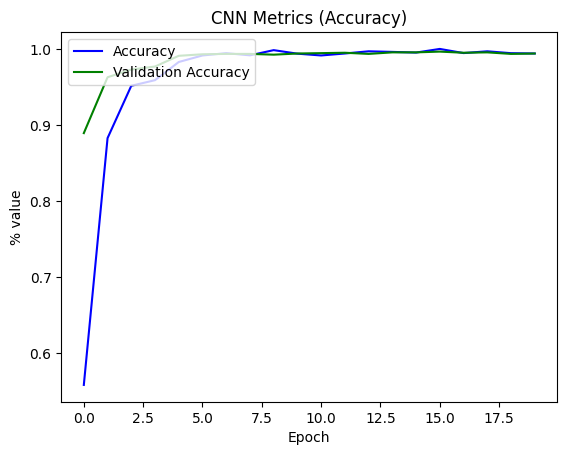

In [15]:
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

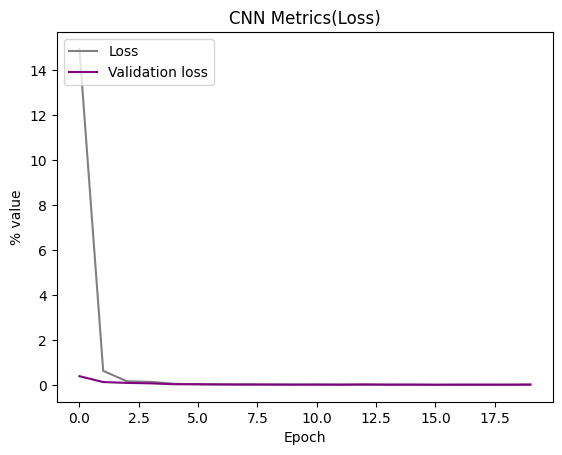

In [16]:
plt.plot(history.history['loss'], color='grey', label='Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation loss')
plt.title('CNN Metrics(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [17]:
y_pred = cnn.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step 


In [18]:
y_actual = test.classes[test.index_array]

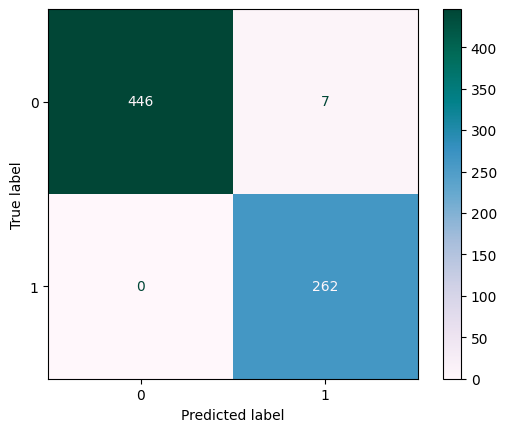

In [19]:
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBuGn')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9845    0.9922       453
           1     0.9740    1.0000    0.9868       262

    accuracy                         0.9902       715
   macro avg     0.9870    0.9923    0.9895       715
weighted avg     0.9905    0.9902    0.9902       715



## Inception Resnet V2

In [21]:
from tensorflow.keras.applications import InceptionResNetV2
IncResNV2 = InceptionResNetV2(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
import datetime

for layer in IncResNV2.layers:
    layer.trainable = False

cnn = keras.Sequential([
    IncResNV2,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

cnn.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ ?                      │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,336,736 (207.28 MB)

In [23]:
history = cnn.fit(
    train,
    steps_per_epoch=50,
    validation_data=valid,
    epochs=20
    )

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6445 - loss: 13.5333 - val_accuracy: 0.9683 - val_loss: 0.1346
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 632ms/step - accuracy: 0.9429 - loss: 0.1619 - val_accuracy: 0.9859 - val_loss: 0.0957
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 899ms/step - accuracy: 0.9622 - loss: 0.1261 - val_accuracy: 0.9904 - val_loss: 0.0595
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 612ms/step - accuracy: 0.9766 - loss: 0.1116 - val_accuracy: 0.9904 - val_loss: 0.0590
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 910ms/step - accuracy: 0.9807 - loss: 0.0883 - val_accuracy: 0.9935 - val_loss: 0.0398
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 604ms/step - accuracy: 0.9811 - loss: 0.0891 - val_accuracy: 0.9935 - val_loss: 0.0477
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 912ms/step - accuracy: 0.9878 - loss: 0.0786 - val_accuracy: 0.9940 - val_loss: 0.0517
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 609ms/step - accuracy: 0.9807 - loss: 0.0923 - val_accur

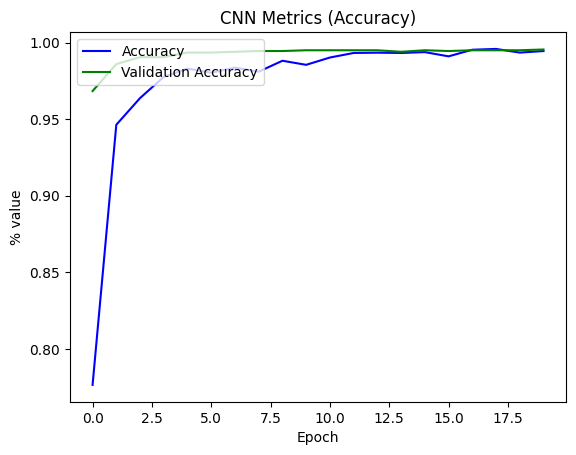

In [24]:
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

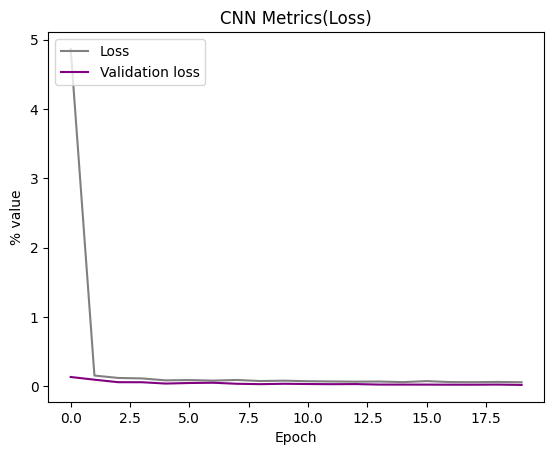

In [25]:
plt.plot(history.history['loss'], color='grey', label='Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation loss')
plt.title('CNN Metrics(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [26]:
y_pred = cnn.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step 


In [27]:
y_actual = test.classes[test.index_array]

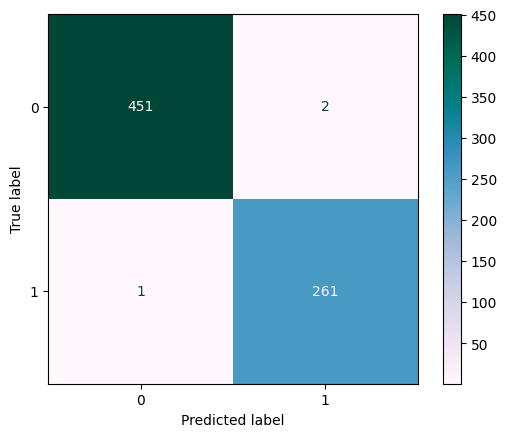

In [28]:
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBuGn')
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9978    0.9956    0.9967       453
           1     0.9924    0.9962    0.9943       262

    accuracy                         0.9958       715
   macro avg     0.9951    0.9959    0.9955       715
weighted avg     0.9958    0.9958    0.9958       715



## MobileNet

In [30]:
train_idgm = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_idgm = ImageDataGenerator(rescale=1./255)

img_sizem = (300, 300)
batch_sizem = 64

arg_trainm = {'target_size': img_sizem,
             'color_mode': 'rgb',
             'class_mode': 'binary',
             'batch_size': batch_sizem}
arg_testm = {'target_size': img_sizem,
            'color_mode': 'rgb',
            'class_mode': 'binary',
            'batch_size': batch_sizem,
            'shuffle': False}

trainm = train_idgm.flow_from_directory(directory=root_dir+'train/', subset='training', **arg_train)
validm = train_idgm.flow_from_directory(directory=root_dir+'train/', subset='validation', **arg_train)
testm  = test_idgm.flow_from_directory(directory=root_dir+'test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import MobileNet
mobilenet = MobileNet(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
import datetime

for layer in mobilenet.layers:
    layer.trainable = False

cnnm = keras.Sequential([
    mobilenet,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

cnnm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


cnnm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [33]:
historym = cnnm.fit(
    train,
    validation_data=valid,
    epochs=20,
    steps_per_epoch=20,
    verbose = 1
    )

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 710ms/step - accuracy: 0.6006 - loss: 21.3841 - val_accuracy: 0.9759 - val_loss: 0.0780
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 977ms/step - accuracy: 0.9314 - loss: 0.1997 - val_accuracy: 0.9829 - val_loss: 0.0596
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - accuracy: 0.9771 - loss: 0.0799 - val_accuracy: 0.9894 - val_loss: 0.0407
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.9913 - loss: 0.0396 - val_accuracy: 0.9950 - val_loss: 0.0332
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 496ms/step - accuracy: 0.9934 - loss: 0.0480 - val_accuracy: 0.9950 - val_loss: 0.0264
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.9958 - loss: 0.0343 - val_accuracy: 0.9955 - val_loss: 0.0218
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step - accuracy: 0.9939 - loss: 0.0244 - val_accuracy: 0.9955 - val_loss: 0.0209
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.9980 - loss: 0.0197 - val_accura

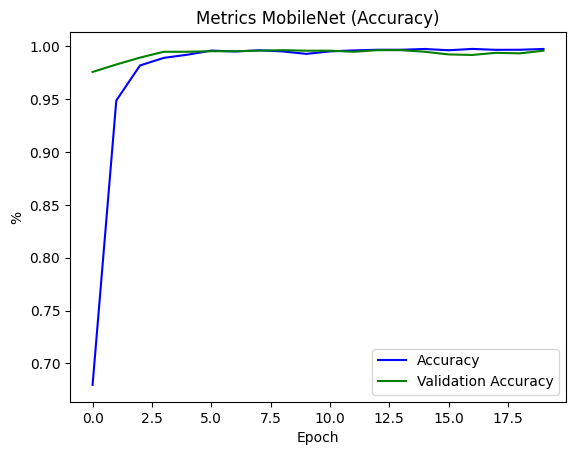

In [34]:
plt.plot(historym.history['accuracy'], color='blue', label='Accuracy')
plt.plot(historym.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Metrics MobileNet (Accuracy)')
plt.ylabel('%')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

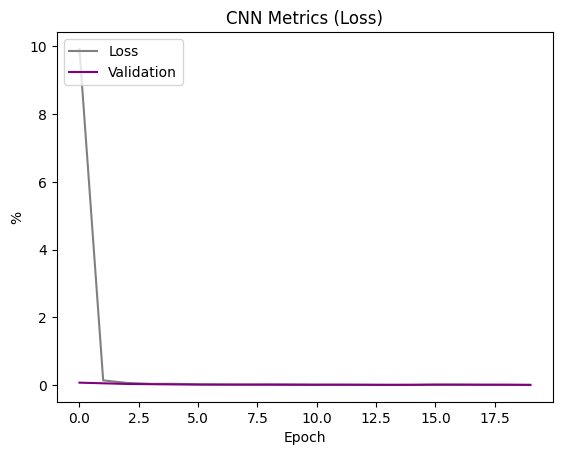

In [35]:
plt.plot(historym.history['loss'], color='grey', label='Loss')
plt.plot(historym.history['val_loss'], color='purple', label='Validation')
plt.title('CNN Metrics (Loss)')
plt.ylabel('%')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

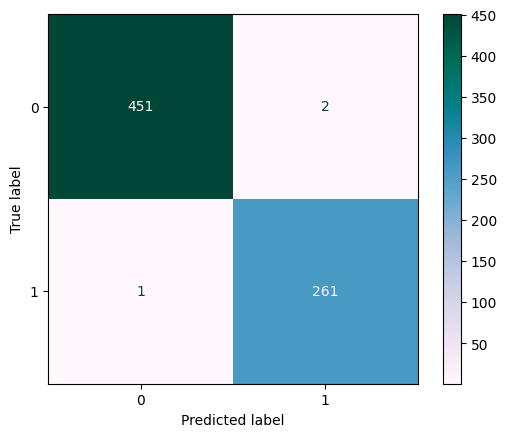

In [37]:
cnnm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnnm)
disp.plot(cmap='PuBuGn')
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9978    0.9956    0.9967       453
           1     0.9924    0.9962    0.9943       262

    accuracy                         0.9958       715
   macro avg     0.9951    0.9959    0.9955       715
weighted avg     0.9958    0.9958    0.9958       715

